# 📊 Customer Churn Prediction - Exploratory Data Analysis (EDA)

## 🧠 Project Objective

The goal of this project is to analyze customer data to understand the key reasons behind **customer churn** in a telecom company. By performing **Exploratory Data Analysis (EDA)**, we aim to uncover patterns, trends, and correlations that help in building predictive models in the future.

---

## 📁 Dataset Overview

- **Dataset Name:** Customer Churn.csv
- **Description:** Contains information about customers, their demographics, services availed, and whether they have churned.

---

## 📌 Columns Description

| Feature | Description |
|--------|-------------|
| `customerID` | Unique ID for each customer |
| `gender` | Gender of the customer |
| `SeniorCitizen` | Whether the customer is a senior citizen (1, 0) |
| `Partner` | Whether the customer has a partner |
| `Dependents` | Whether the customer has dependents |
| `tenure` | Number of months the customer has stayed |
| `PhoneService` | Whether the customer has phone service |
| `MultipleLines` | Whether the customer has multiple lines |
| `InternetService` | Type of internet service (DSL, Fiber optic, No) |
| `OnlineSecurity`, `OnlineBackup`, etc. | Various services |
| `Contract` | Contract type (Month-to-month, One year, Two year) |
| `PaymentMethod` | Mode of payment |
| `MonthlyCharges` | Monthly billing amount |
| `TotalCharges` | Total amount charged |
| `Churn` | Whether the customer has churned (Yes/No) |

---

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data from CSV file
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Handling TotalCharges Column

The `TotalCharges` column has some missing or blank values and is stored as text (`object`). 

We will:
- Replace blank values with 0
- Convert the column to float type for analysis

In [4]:
df["TotalCharges"] =  df["TotalCharges"].replace(" ", 0)
df["TotalCharges"] =  df["TotalCharges"].astype("float")

Now the `TotalCharges` column is clean and of numeric type (`float`). This will allow for accurate statistical computations and visualizations in the upcoming EDA steps.


In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Checking for Missing Values

Let's check if there are any missing (null) values in the dataset. This helps us find columns that may need cleaning.


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

This shows the total number of missing values in each column. We can now decide how to handle them if needed.


## Summary Statistics

Let's look at the summary statistics of the numerical columns using `describe()`. This helps us understand the basic stats like mean, min, max, and standard deviation.


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


This gives us a quick overview of the distribution and range of numeric features in the dataset.


## Checking for Duplicate Customer IDs

Each customer should have a unique `customerID`. Let's check if there are any duplicate IDs in the dataset.


In [8]:
df["customerID"].duplicated().sum()

np.int64(0)

If the result is 0, it means all customer IDs are unique. If not, we may need to handle duplicates.


## Converting SeniorCitizen Values

The `SeniorCitizen` column has values as 1 and 0, which are not very clear.

We will:
- Convert 1 to `"yes"` (senior citizen)
- Convert 0 to `"no"` (not a senior citizen)

This makes the data easier to understand during analysis.


In [9]:
def convertSeniorCitizen(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(convertSeniorCitizen)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Now the `SeniorCitizen` column has clear values: "yes" or "no", which makes it easier to analyze.


## Churn Count Plot

Let's visualize how many customers have churned vs. how many have not using a count plot. This gives us an idea of the churn distribution in the dataset.


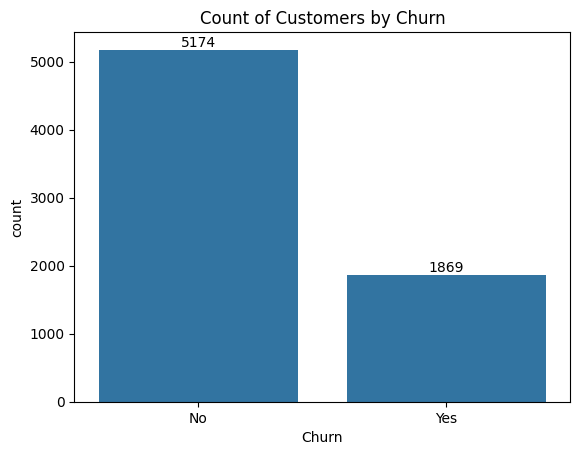

In [10]:
chart = sns.countplot(x = 'Churn', data=df)
chart.bar_label(chart.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

This chart shows the total number of customers who have churned and who have stayed. It's useful for understanding class balance.


## Churn Distribution - Pie Chart

Now let's visualize the percentage of customers who have churned vs. those who haven't using a pie chart. This gives a better sense of proportion.


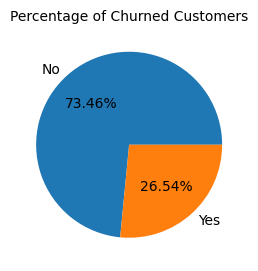

In [11]:
plt.figure(figsize=(3,4))
gb_data = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb_data["Churn"],labels=gb_data.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize=10)
plt.show()

This pie chart shows the percentage split between churned and retained customers.


## Churn by Gender

Let's see if gender has any impact on customer churn. This chart compares churned and non-churned customers for each gender.


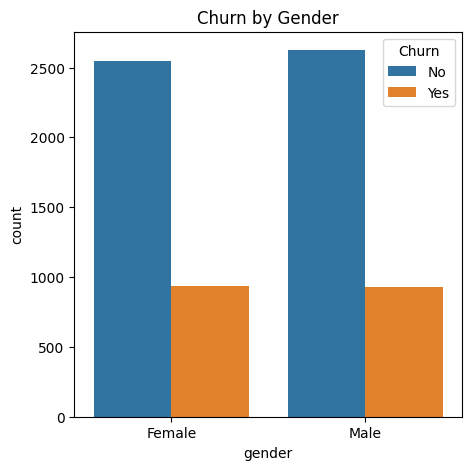

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(x="gender", data=df, hue="Churn")
plt.title("Churn by Gender")
plt.show()


This chart helps us understand if there's any noticeable difference in churn between male and female customers.


## Count of Customers by Senior Citizen

This chart shows how many customers are senior citizens and how many are not. It helps us understand the age group distribution in the dataset.


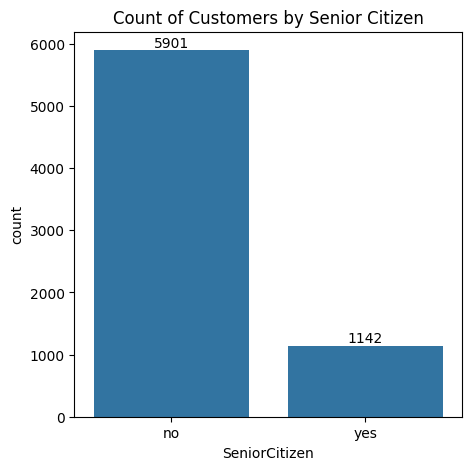

In [13]:
plt.figure(figsize=(5,5))
chart = sns.countplot(x="SeniorCitizen", data=df)
chart.bar_label(chart.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

We now see the total number of senior vs. non-senior customers in the dataset.


## Stacked Percentage Chart - Churn by Senior Citizen

This chart shows the percentage of customers who churned or stayed, split by whether they are senior citizens or not.

We use a stacked bar to make the churn ratio easier to compare.


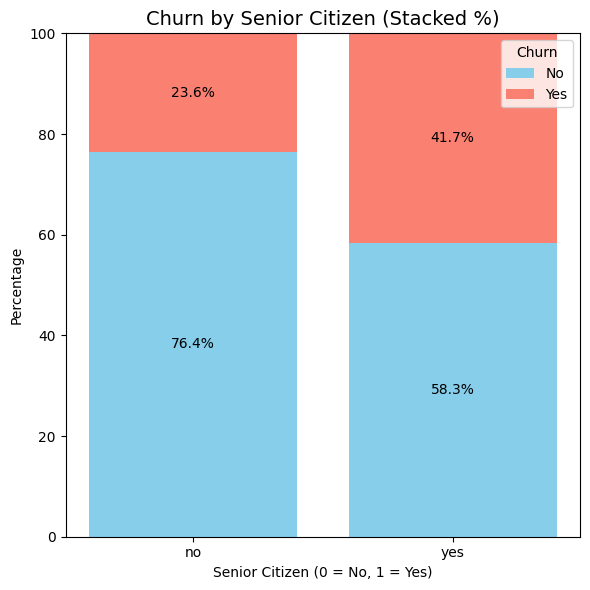

In [14]:
# Create crosstab (counts of churn by senior citizen status)
crosstab = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Calculate percentages
crosstab_percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))

bottom = [0] * len(crosstab_percent)
colors = ['skyblue', 'salmon']

for i, column in enumerate(crosstab_percent.columns):
    ax.bar(crosstab_percent.index,
           crosstab_percent[column],
           bottom=bottom,
           label=column,
           color=colors[i])
    
    # Add percentage labels
    for j in range(len(crosstab_percent)):
        height = crosstab_percent[column].iloc[j]
        if height > 0:
            ax.text(j,
                    bottom[j] + height / 2,
                    f'{height:.1f}%',
                    ha='center',
                    va='center',
                    color='black',
                    fontsize=10)
    # Update bottom for next stack
    bottom = [x + y for x, y in zip(bottom, crosstab_percent[column])]

ax.set_title("Churn by Senior Citizen (Stacked %)", fontsize=14)
ax.set_xlabel("Senior Citizen (0 = No, 1 = Yes)")
ax.set_ylabel("Percentage")
ax.legend(title="Churn")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


This chart shows the churn percentage within each group. We can clearly see how churn differs between senior and non-senior citizens.


## Tenure Distribution by Churn

This chart shows how long customers have stayed (`tenure`) and compares it with churn status. It helps us see if churn is related to how long a customer has been with the company.


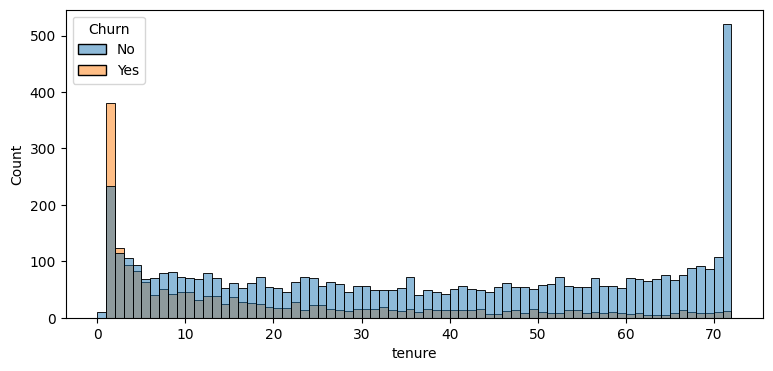

In [15]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure",data=df,bins=72,hue="Churn")
plt.show()

We can observe if customers with shorter or longer tenure are more likely to churn.


## Churn by Contract Type

This chart shows how customer churn varies by contract type (Month-to-month, One year, Two year). It helps identify which contract types have higher churn rates.


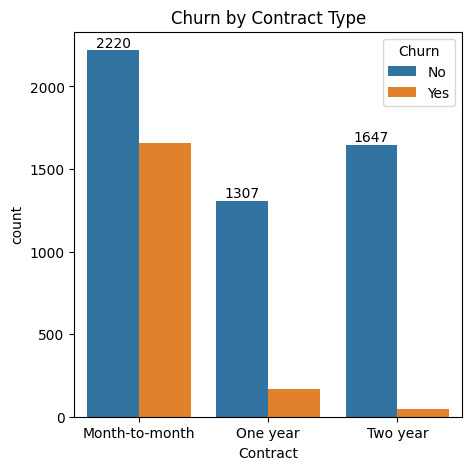

In [16]:
plt.figure(figsize=(5,5))
chart = sns.countplot(x="Contract", data=df, hue="Churn")
chart.bar_label(chart.containers[0])
plt.title("Churn by Contract Type")
plt.show()

We can now compare churn across different contract types and see which ones are more stable.


## Churn by Services Used

Let's check how customer churn relates to different services like internet, phone, streaming, and support.

Each chart below shows how many customers used a specific service and whether they churned or not.


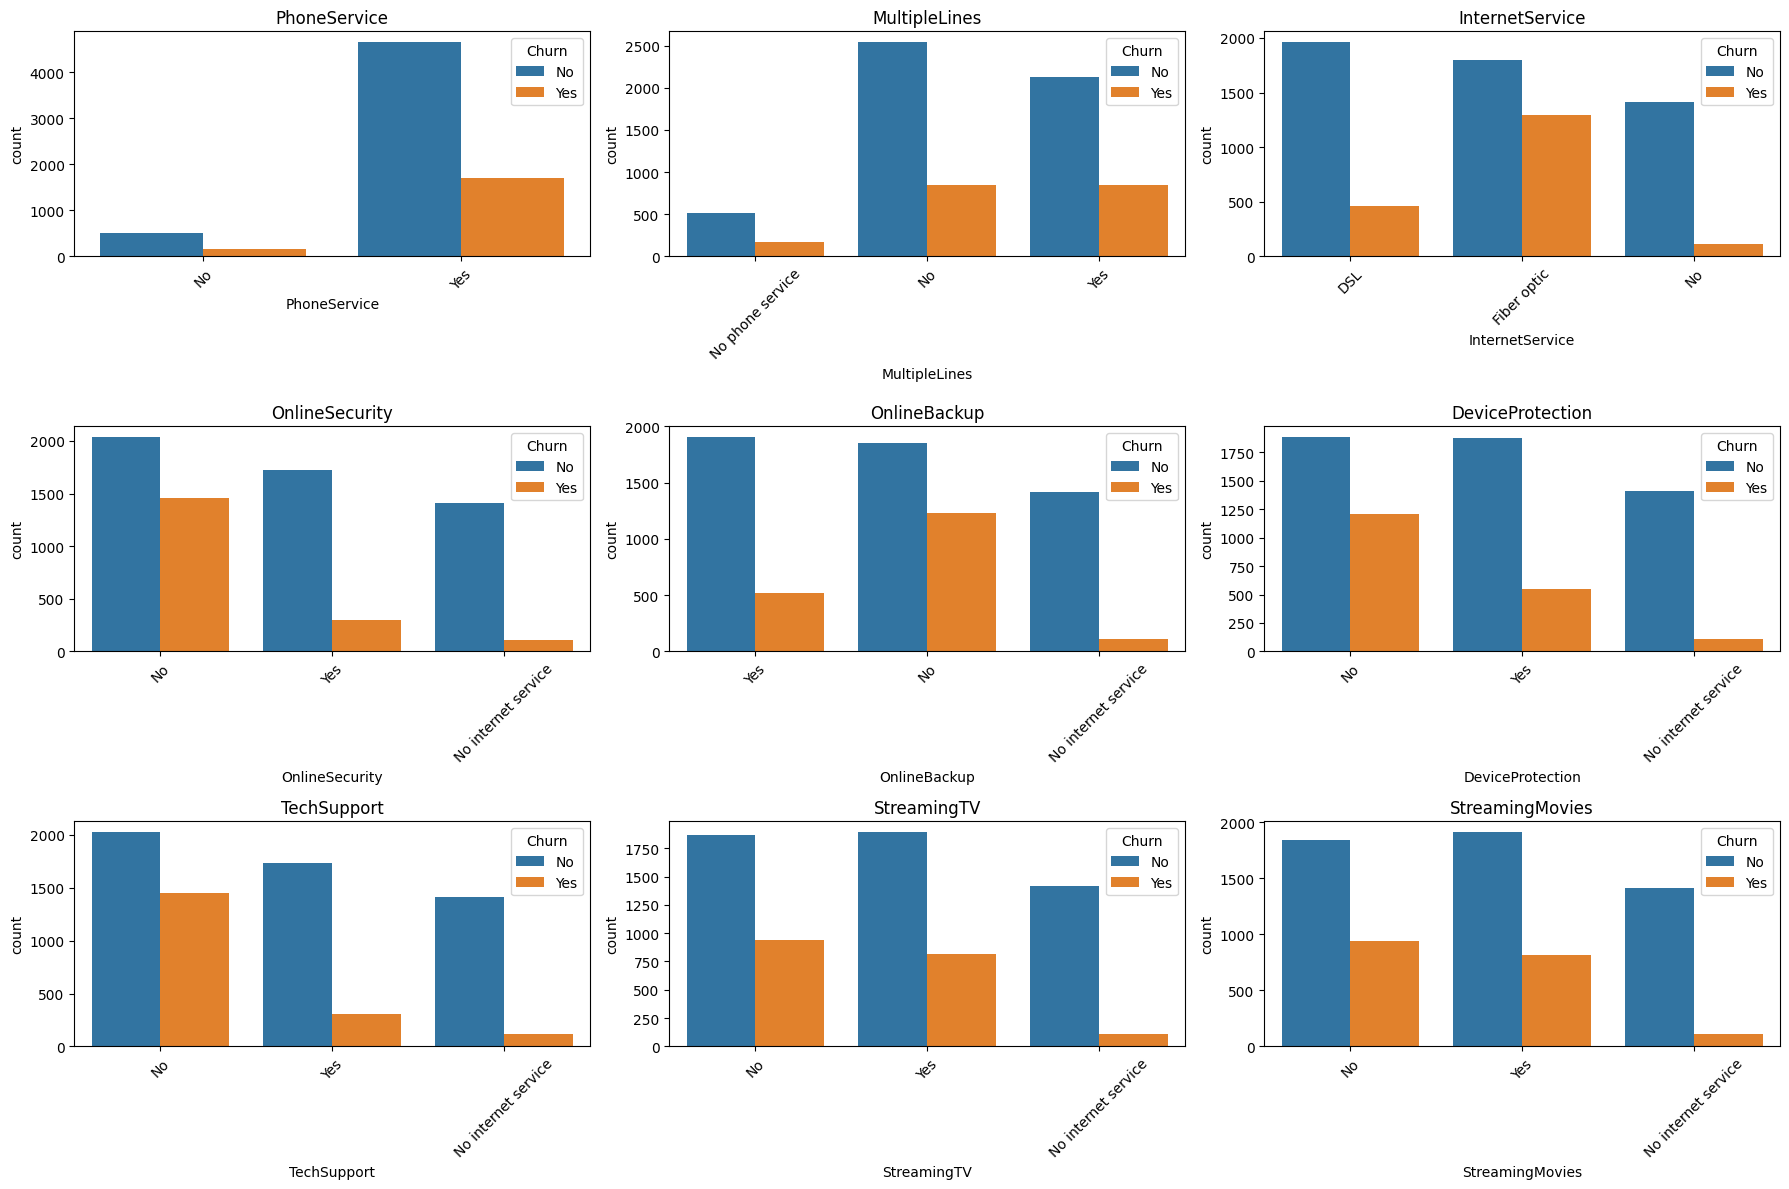

In [17]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set layout
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

# Plot countplot for each column (no hue)
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], hue=df["Churn"])
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Remove extra axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The visualizations show customer churn distribution across various telecom services. Customers without internet services tend to have lower churn rates, while those with services like "No OnlineSecurity", "No TechSupport", and "No OnlineBackup" exhibit higher churn. Additionally, churn is more prominent among fiber optic internet users and those without device protection. Overall, value-added services seem linked to customer retention.


## Churn by Payment Method

This chart shows how customer churn varies across different payment methods. It helps us understand if certain payment types are linked to higher churn.


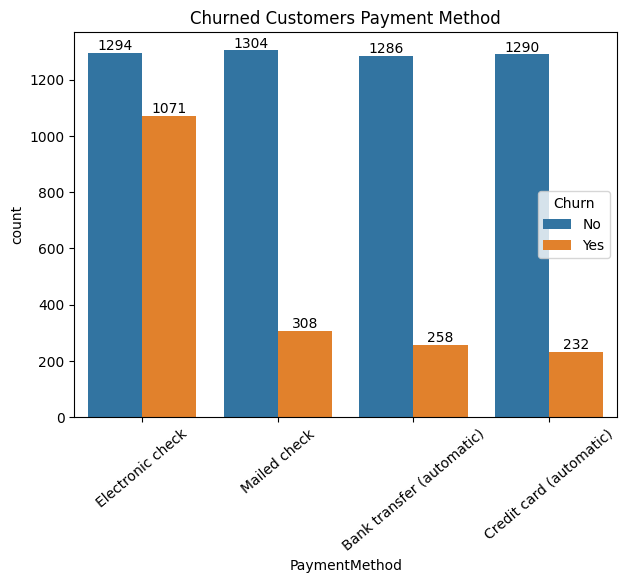

In [18]:
plt.figure(figsize=(7,5))
chart = sns.countplot(x="PaymentMethod", data=df, hue="Churn")
chart.bar_label(chart.containers[0])
chart.bar_label(chart.containers[1])
plt.xticks(rotation=40)
plt.title("Churned Customers Payment Method")
plt.show()

We can now see which payment methods have more churned customers. This can help identify potential issues with specific payment options.
